In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

%matplotlib inline

### Importando os dados

In [2]:
raw_use_of_force = pd.read_csv("./../use-of-force.csv")

#### Dados sem formatação

In [3]:
raw_use_of_force.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8061 entries, 0 to 8060
Data columns (total 11 columns):
ID                   8061 non-null object
Incident_Num         8061 non-null int64
Incident_Type        8061 non-null object
Occured_date_time    8061 non-null object
Precinct             7454 non-null object
Sector               8061 non-null object
Beat                 7454 non-null object
Officer_ID           8061 non-null int64
Subject_ID           8061 non-null int64
Subject_Race         6730 non-null object
Subject_Gender       7866 non-null object
dtypes: int64(3), object(8)
memory usage: 692.8+ KB


### Preparação dos dados

In [4]:
# 1 - Substituir o sinal "-" pelo "nan" que tem um melhor desempenho para computar valores faltosos

raw_use_of_force.loc[raw_use_of_force.Sector == '-', 'Sector'] = np.nan

# 2 - Converter do campo de data do tipo string para o tipo datetime

raw_use_of_force['Occured_date_time'] = pd.to_datetime(raw_use_of_force['Occured_date_time'])

# 3 - Analisando os dados percebemos que delegacia S tem dados do setor U, mas o setor U pertence apenas a delegacia N,
# vamos então alterar o valor da delegacia de S para N para este setor.

raw_use_of_force.loc[(raw_use_of_force['Sector'] == 'U') & (raw_use_of_force['Precinct'] == 'S'),
                                        'Precinct'] = 'N'

# 4 - Também é possível perceber que existe uma delagacia sobresalente (X), esta delagacia não é mencionada pelo departamento 
# de Seattle, então vamos excluí-la.

raw_use_of_force = raw_use_of_force[raw_use_of_force['Precinct'] != 'X']

## Análise Exploratória de Dados

In [5]:
# 1. Como é a distribuição do uso de força dentre as delegacias e os setores? Em cada setor, qual o *beat* 
# com maior número de incidentes? Apresente também o ranking dos setores segundo o percentual de incidentes 
# "Level 2" em relação ao total de incidentes do respectivo setor.

In [6]:
# Uso da força por delegacia

In [7]:
precinct_groupby = raw_use_of_force.groupby('Precinct').count() 

In [8]:
# Foi selecionado apenas o campo Incident_Num, que expressa mais fielmente a quantidade agrupada pelo seu valor único
# Também foi renomeado o campo Incidente_Num para Quantity e foram ordenados os dados.

raw_use_of_force.groupby('Precinct').count() 
precinct_groupby = precinct_groupby[['Incident_Num']]
precinct_groupby.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)
precinct_groupby.sort_values(by='Quantity', ascending=False ,inplace=True)
precinct_groupby

,Quantity
Precinct,
W,2015
N,1836
E,1434
S,1346
SW,480


### O gráfico a seguir revela que as delegacias de West e North são as que tem maiores números de incidentes. Mas o destaque vai para a delegacia de Southwest, que é a que tem, por bastante vantagem, o menor número de incidentes.

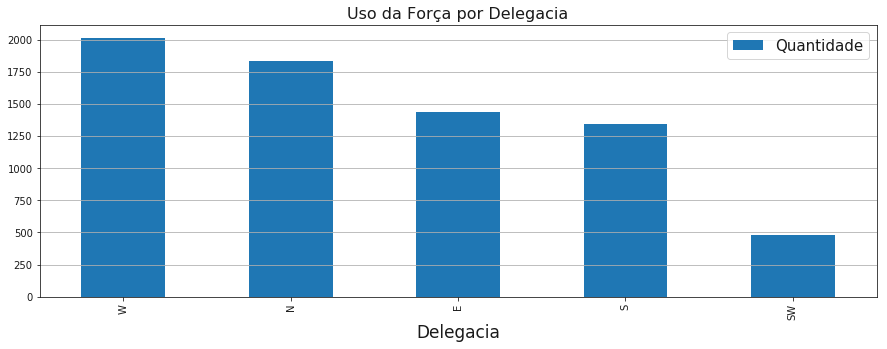

In [90]:
precinct_groupby.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Delegacia', fontsize=17)
plt.legend(['Quantidade'], fontsize=15)
plt.title('Uso da Força por Delegacia', fontsize=16)
plt.grid(axis='y')

In [10]:
# Uso da força por setor

In [11]:
# Foi selecionado apenas o campo Incident_Num, que expressa mais fielmente a quantidade agrupada pelo seu valor único
# Também foi renomeado o campo Incidente_Num para Quantity e foram ordenados os dados.

sector_groupby = raw_use_of_force.groupby(['Precinct', 'Sector']).count()
sector_groupby = sector_groupby[['Incident_Num']]
sector_groupby.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)
sector_groupby.sort_values(by='Quantity', ascending=False, inplace=True)

### O próximo gráfico revela que o maior número de incidentes, fica setor de E da delegacia de East. A delegacia West, a que concentra o maior número de incidentes aparece em segundo lugar com o setor K. Seguindo o gráfico anterior a delegacia de Southwest, setor W, é a que aparece com menor número de incidentes.

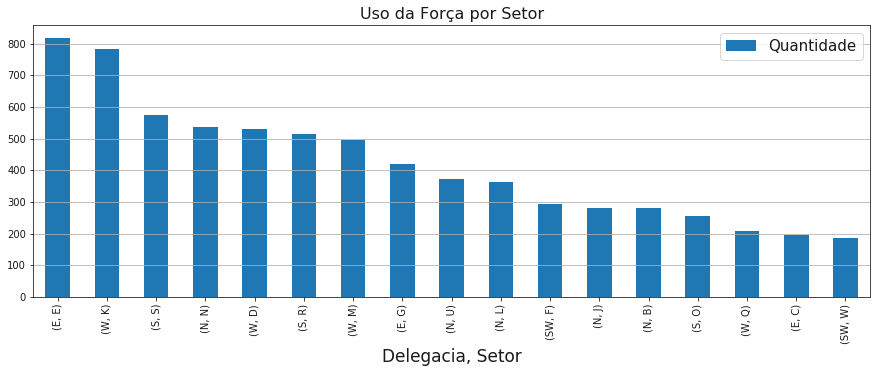

In [91]:
sector_groupby.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Delegacia, Setor', fontsize=17)
plt.legend(['Quantidade'], fontsize=15)
plt.title('Uso da Força por Setor', fontsize=16)
plt.grid(axis='y')

In [13]:
# Uso da força por beat

In [14]:
# Foi selecionado apenas o campo Incident_Num, que expressa mais fielmente a quantidade agrupada pelo seu valor único.
# Também foi renomeado o campo Incidente_Num para Quantity.

beat_groupby = raw_use_of_force.groupby(['Precinct', 'Sector', 'Beat']).count()
beat_groupby = beat_groupby[['Incident_Num']]
beat_groupby.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)
beat_groupby.reset_index(inplace=True)

# Foi Selecionado apenas o beat com maior número de incidentes por Setor, atualizado os índices do dataframe, 
# e foram ordernados os dados.

beat_groupby_max = beat_groupby.groupby('Sector').max()
beat_groupby_max.reset_index(inplace=True)
beat_groupby_max = beat_groupby_max.set_index(['Precinct', 'Sector', 'Beat'])
beat_groupby_max.sort_values(by='Quantity', ascending=False, inplace=True)

### Neste gráfico podemos perceber claramente que o beat E3, é o que puxa o setor E para o topo, como vimos no gráfico anterior de setores. A delegacia Southwest, setor W e beat W3 aparece na penultima posição desta vez. Contudo é interessante notar que a delgacia East, setor C beat C3 aparece em último lugar neste gráfico. 


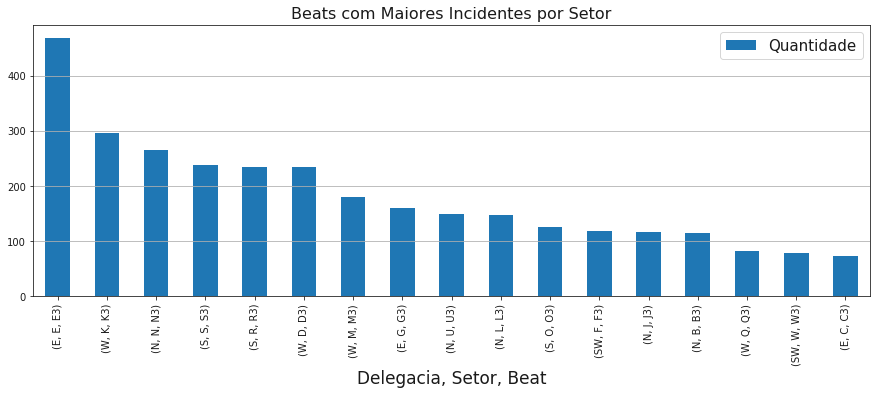

In [92]:
# Beats com maiores incidentes por Setor
beat_groupby_max.plot(kind='bar', figsize=(15, 5))
plt.xlabel('Delegacia, Setor, Beat', fontsize=17)
plt.legend(['Quantidade'], fontsize=15)
plt.title('Beats com Maiores Incidentes por Setor', fontsize=16)
plt.grid(axis='y')

In [16]:
# Rank por Setor

In [17]:
sector_incident_type = raw_use_of_force.groupby(['Precinct', 'Sector', 'Incident_Type'])['Incident_Num'].count()

In [18]:
sector_incidente_percent = sector_incident_type.groupby(level=1).apply(lambda x: x * 100/ x.sum()).reset_index()

In [19]:
# Selecionando apenas incidentes do level 2, renomeando o campo e odernando o dataframe

is_level_2 = sector_incidente_percent['Incident_Type'] == 'Level 2 - Use of Force'
sector_incidente_percent = sector_incidente_percent[is_level_2]
sector_incidente_percent.rename(columns={'Incident_Num': 'Percent'}, inplace=True)
sector_incidente_percent.sort_values(by='Percent', ascending=True, inplace=True)
sector_incidente_percent.set_index(['Precinct', 'Sector'], inplace=True)

### Observando esse gráfico podemos perceber que os incidentes level 2 são minoria, em alguns casos chegam a menos de 15% do total do setor. Entretanto, os que tem as maiores porcentagem são mais que duas vezes os menores. Vale notar que a delgacia West, a que tem os maiores números de incidentes, está em primeiro lugar.

Text(0.5,1,'Porcentagem de Incidentes level 2 por Setor')

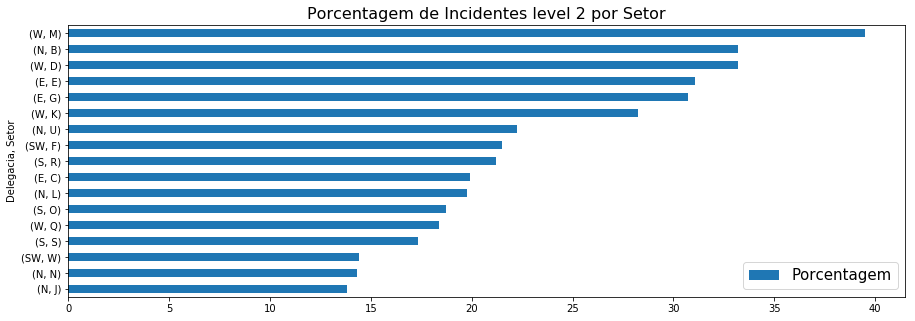

In [20]:
sector_incidente_percent.plot(kind='barh', figsize=(15, 5))
plt.ylabel('Delegacia, Setor')
plt.legend(['Porcentagem'], fontsize=15)
plt.title('Porcentagem de Incidentes level 2 por Setor', fontsize=16)

In [107]:
# 2. Com relação à distribuição dos incidentes no tempo, é possível encontrar picos ou linhas de tendência dentro 
# dos dias, dos meses, das semanas ou dos anos?

In [74]:
# Incidentes por dia

In [22]:
# Foi obtido apenas a data sem o horário e agrupado por esse campo

incident_date_day = raw_use_of_force.copy()

incident_date_day['date'] = pd.to_datetime(incident_date_day['Occured_date_time']).dt.to_period('D')
incident_date_day = incident_date_day.groupby(['date']).count()

# Foi selecionado apenas o campo Incident_Num, que expressa mais fielmente a quantidade agrupada pelo seu valor único
# Também foi renomeado o compo Incident_Num para Quantity e os dados foram ordenados

incident_date_day = incident_date_day[['Incident_Num']]
incident_date_day.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)

### Este gráfico tem uma granilidade muito alta, contudo podemos perceber que os picos de quantidade de incidentes estão diminuindo ao longo do tempo, ficando cada vez menos frequente.

Text(0.5,1,'Incidentes com Granulalidade por Dia')

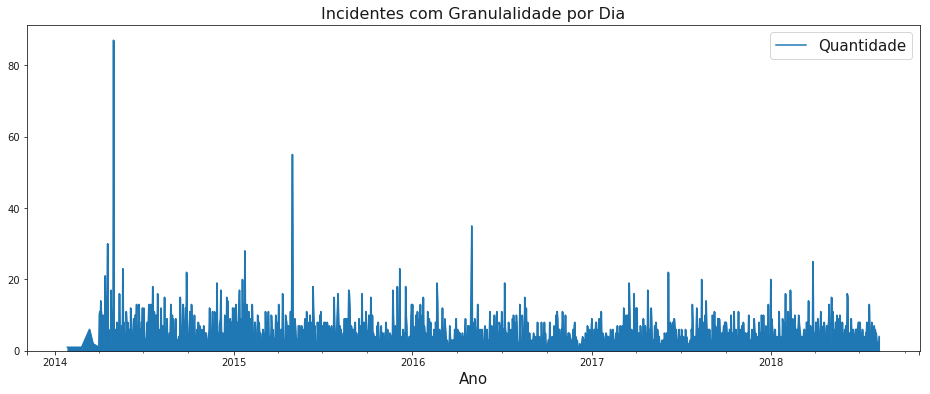

In [94]:
fig, ax = plt.subplots(figsize=(16, 6))
incident_date_day.plot(ax=ax, kind='area')
plt.xlabel('Ano', fontsize=15)
plt.legend(['Quantidade'], fontsize=15)
plt.title('Incidentes com Granulalidade por Dia', fontsize=16)

In [80]:
# Incidentes por ano-mês

In [81]:
# A data foi transformada para o formato ano-mês e os dados foram agrupandos

incident_date_year_month = raw_use_of_force.copy()
incident_date_year_month['year_month'] = incident_date_year_month['Occured_date_time'].dt.to_period('M')
incident_date_year_month = incident_date_year_month.groupby(['year_month']).count()

# Selecionando apenas um campo onde existe a contagem e renomeando.

incident_date_year_month = incident_date_year_month[['Incident_Num']]
incident_date_year_month.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)

### Podemos perceber neste gráfico que existe um aumento de incidentes no final de todo ano e logo depois há uma diminuida. 

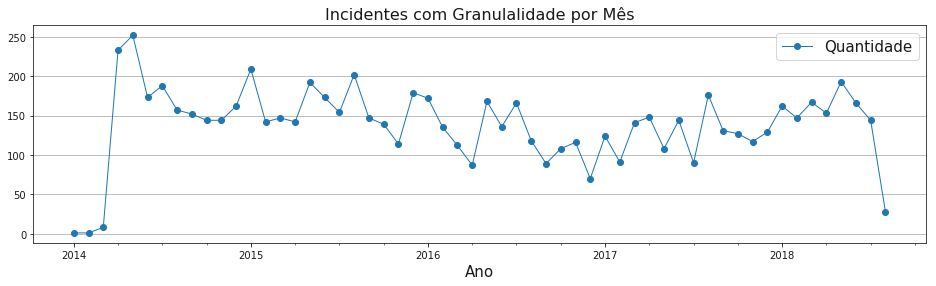

In [95]:
fig, ax = plt.subplots(figsize=(16, 4))
incident_date_year_month.plot(ls="-", lw="1", marker="o", ax=ax)
plt.xlabel('Ano', fontsize=15)
plt.legend(['Quantidade'], fontsize=15)
plt.title('Incidentes com Granulalidade por Mês', fontsize=16)
plt.grid(axis='y')

In [83]:
# Incidentes por semana

In [31]:
incident_date_week = incident_date_week.groupby(['week']).count()

In [32]:
# A data foi transformada para o formato de semana e os dados foram agrupandos

incident_date_week = raw_use_of_force.copy()
incident_date_week['week'] = pd.to_datetime(incident_date_week['Occured_date_time']).dt.to_period('W')
incident_date_week = incident_date_week.groupby(['week']).count()

# Selecionando apenas um campo onde existe a contagem e renomeando.

incident_date_week = incident_date_week[['Incident_Num']]
incident_date_week.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)

### No seguinte gráfico o ano de 2017 revela ser o mais estável, quase sempre mantendo a quantidade de incidentes por semana entre 20 e 40. Também podemos perceber que o ano de 2018 não está completo.

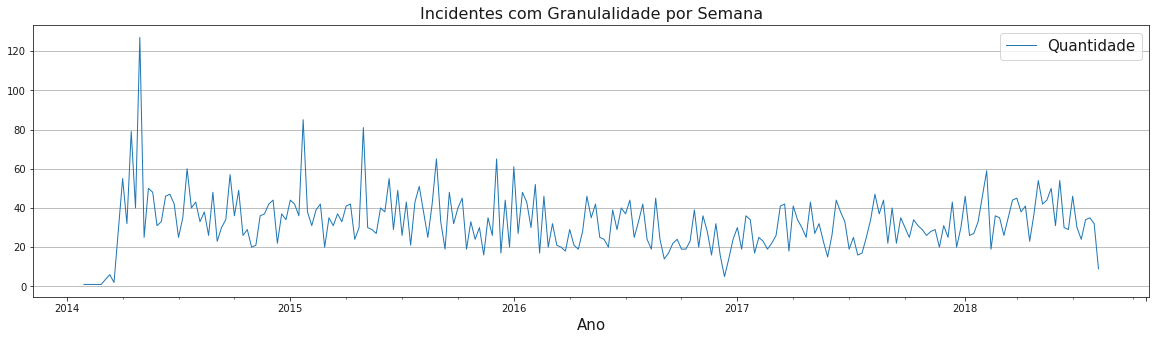

In [102]:
fig, ax = plt.subplots(figsize=(20, 5))
incident_date_week.plot(ls="-", lw="1", ax=ax)
plt.xlabel('Ano', fontsize=15)
plt.legend(['Quantidade'], fontsize=15)
plt.title('Incidentes com Granulalidade por Semana', fontsize=16)
plt.grid(axis='y')

In [103]:
# Incidentes por ano

In [104]:
# A data foi transformada para ser apenas o ano e os dados foram agrupandos

incident_date_year = raw_use_of_force.copy()
incident_date_year['year'] = pd.to_datetime(incident_date_year['Occured_date_time']).dt.to_period('Y')
incident_date_year = incident_date_year.groupby(['year']).count()

# Selecionando apenas um campo onde existe a contagem e renomeando.

incident_date_year = incident_date_year[['Incident_Num']]
incident_date_year.rename(columns={'Incident_Num': 'Quantity'}, inplace=True)

### Neste gráfico é mais evidente a redução dos incidentes ao longo dos anos, porém não temos dados suficente do ano de 2018 para ter uma conclusão mais precisa. É interessante notar que o ano de 2015 ficou em bastante destaque pelo número de incidentes.

Text(0.5,1,'Incidentes com Granulalidade por Ano')

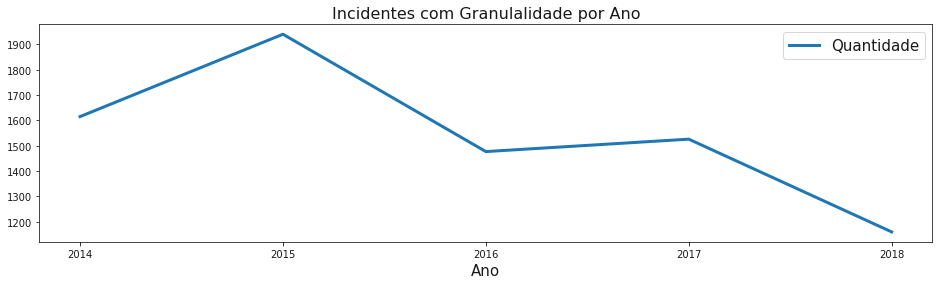

In [110]:
fig, ax = plt.subplots(figsize=(16, 4))
incident_date_year.plot(lw='3', ax=ax)
plt.xlabel('Ano', fontsize=15)
plt.legend(['Quantidade'], fontsize=15)
plt.title('Incidentes com Granulalidade por Ano', fontsize=16)

In [108]:
# 3. A polícia deseja dar início a uma investigação interna para verificar se existem policiais excessivamente violentos. 
# No entanto, o prazo para o término desta investigação é bastante limitado. Elabore um script capaz de elencar os 
# policiais em ordem decrescente de chance de violência excessiva com base no número de incidentes dos quais eles participaram.

In [123]:
# Os dados foram agrupados, foi resetado os índices, calculada a percentagem e ordenados os valores.

incident_office = raw_use_of_force.groupby(['Officer_ID'])['Incident_Num'].count()
incident_office = incident_office.reset_index()
incident_office['percentage'] = incident_office['Incident_Num'] * 100/incident_office['Incident_Num'].sum()
incident_office.sort_values(by='percentage', ascending=False, inplace=True)

# Recuperando o top 10 de policiais com mais incidentes para gerar um gráfico. 

incident_office_top_10 = incident_office.head(10).copy()
incident_office_top_10.sort_values(by='percentage', ascending=True, inplace=True)

### Podemos perceber por este gráfico que o Policial 456 é o que tem maior número de incidentes, chegando a quase 1% do total. Sendo que, o segundo colocado não chega a 6%. 

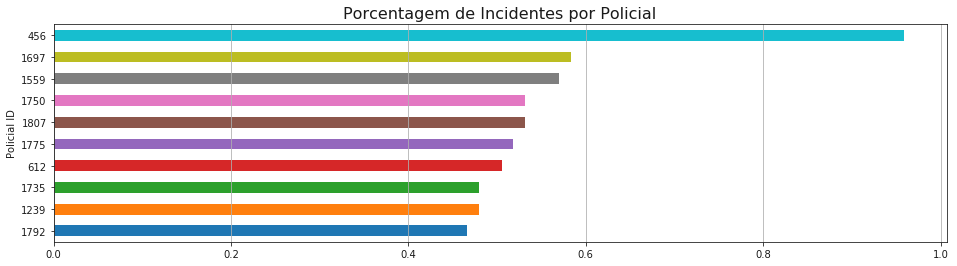

In [126]:
fig, ax = plt.subplots(figsize=(16, 4))
incident_office_top_10.plot(x='Officer_ID', y='percentage', kind='barh', ax=ax)

plt.ylabel('Policial ID')
plt.legend().remove()
plt.title('Porcentagem de Incidentes por Policial', fontsize=16)
plt.grid(axis='x')

### Exemplo da lista criada com os policiais ordenados pela porcentagem dos incidentes

In [125]:
incident_office.reset_index(inplace=True, drop=True)
incident_office.head()

,Officer_ID,Incident_Num,percentage
0,456,74,0.958798
1,1697,45,0.583053
2,1559,44,0.570096
3,1807,41,0.531226
4,1750,41,0.531226


In [131]:
# 4. Uma métrica interessante para a polícia é o grau de reincidência por parte dos civis. Apresente o percentual 
# de casos reincidentes em relação ao total de incidentes em cada setor e verifique se há correlação entre esta métrica e
# o percentual de incidentes "Level 2" calculado na questão 1. Que interpretação pode ser dada a este resultado?

In [129]:
# Foi agrupado e selecionado apenas o campo Incident_Num, que expressa mais fielmente a quantidade agrupada pelo seu valor único.
# Quando houver reincidência, ou seja, quando o incidente ocorrer mais de uma vez, 
# o campo 'Repeated' é verdadeiro, se não, falso.

incident_sector_subject = raw_use_of_force.groupby(['Precinct', 'Sector', 'Subject_ID']).count()
incident_sector_subject = incident_sector_subject[['Incident_Num']]
incident_sector_subject.loc[incident_sector_subject['Incident_Num'] >= 2, 'Repeated'] = True
incident_sector_subject.loc[incident_sector_subject['Incident_Num'] == 1, 'Repeated'] = False

incident_sector_subject_count = incident_sector_subject.groupby(['Precinct', 'Sector', 'Repeated']).count()

In [130]:
# Calculanda a porcentagem, redefinidos os índices do dataframe, renomeado o campo 'Incident_Num' e ordenados os valores

incident_sector_subject_count = incident_sector_subject_count.groupby(level=1).apply(lambda x: x * 100/ x.sum())
incident_sector_subject_count.reset_index(inplace=True)
# incident_sector_subject_count.set_index(['Precinct', 'Sector'], inplace=True)
incident_sector_subject_count.rename(columns={'Incident_Num': 'Percent'}, inplace=True)
incident_sector_subject_count.sort_values(by='Sector', ascending=False, inplace=True)

#Foi resetado o index, filtrado apenas os incidentes repetidos e os dados foram ordenados

sector_incidente_percent.reset_index(inplace=True)
is_repeated = incident_sector_subject_count['Repeated'] == True
incident_sector_subject_count = incident_sector_subject_count[is_repeated]
sector_incidente_percent.sort_values(by='Sector', ascending=False, inplace=True)

Text(0.5,1,'Quandidade de Reincidência de Civis por Setor ')

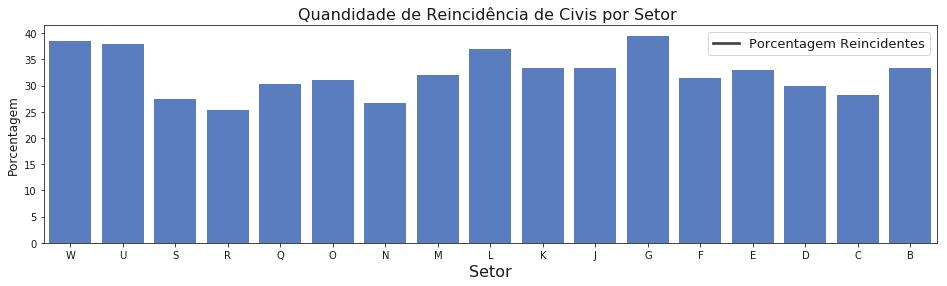

In [166]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.set_color_codes("muted")
sns.barplot(x=incident_sector_subject_count['Sector'], y=incident_sector_subject_count['Percent'],
            color='b')
plt.legend(['Porcentagem Reincidentes'], fontsize=13)
plt.ylabel('Porcentagem', fontsize=12)
plt.xlabel('Setor', fontsize=16)
plt.title('Quandidade de Reincidência de Civis por Setor ', fontsize=16)

Text(0.5,1,'Porcentagem de Incidentes level 2 por Setor')

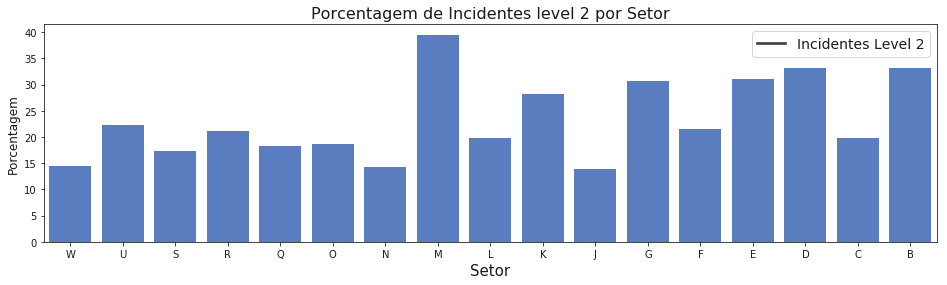

In [151]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.set_color_codes("muted")
sns.barplot(x=sector_incidente_percent['Sector'], y=sector_incidente_percent['Percent'], color='b',
           label='Lelve 2 Incident')
ax.legend(ncol=2, loc="upper right", frameon=True)
plt.ylabel('Porcentagem', fontsize=12)
plt.xlabel('Setor', fontsize=15)
plt.legend(['Incidentes Level 2'], fontsize=14)
plt.title('Porcentagem de Incidentes level 2 por Setor', fontsize=16)

### Como podemos perceber nos dois últimos gráficos acima e no gráfico a seguir: não conseguimos achar uma correlação entre a reincidência por civis e incidentes level 2. A porcentagem de reicidentes por civís é normalmente maior que a porcentagem de incidentes level 2.

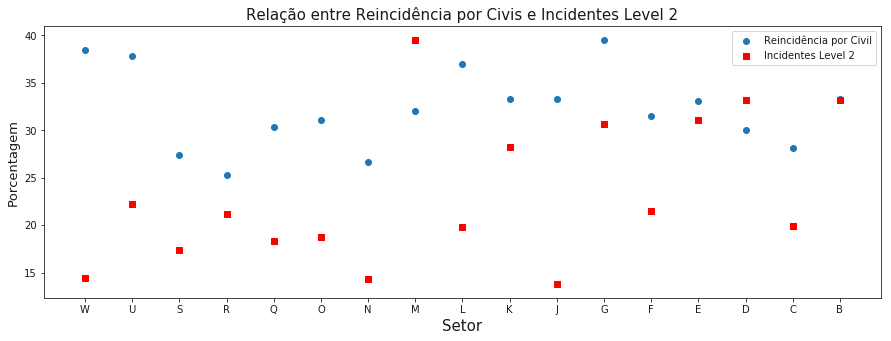

In [175]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.scatter(x=incident_sector_subject_count['Sector'], y=incident_sector_subject_count['Percent'])
plt.scatter(x=sector_incidente_percent['Sector'], y=sector_incidente_percent['Percent'], color='red', marker='s')
plt.ylabel('Porcentagem', fontsize=13)
plt.xlabel('Setor', fontsize=15)
plt.title('Relação entre Reincidência por Civis e Incidentes Level 2', fontsize=15)
plt.legend(['Reincidência por Civil', 'Incidentes Level 2'])

## Aprendizagem de Máquina


In [155]:
# 5. A liderança do Departamento de Polícia de Seattle manifestou o interesse em uma aplicação que classifica os 
# incidentes em "Level 1" ou "Level 2" com base em outras colunas da tabela e lhe requisitou um parecer sobre esta proposta. 
# Descreva os desafios envolvidos, enumere fatores que fomentem a criação deste classificador e sugira um modelo estatístico
# para executar esta tarefa, justificando a sua escolha. P.S.: Sua justificativa deve conter explicação teórica de ao menos
# dois algoritmos, um benchmark destas soluções candidatas de tempo e performance, os experimentos e análise do 
# bias variance threshold.

### Preparação dos dados

In [154]:
# Os tratamentos que fizemos nos dados na parte de análise vão ser aproveitados e outros serão realizados.

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

#### Apagando valores faltosos


In [54]:
use_of_force = raw_use_of_force.dropna()
use_of_force.reset_index(inplace=True)
use_of_force.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5968 entries, 0 to 5967
Data columns (total 12 columns):
index                5968 non-null int64
ID                   5968 non-null object
Incident_Num         5968 non-null int64
Incident_Type        5968 non-null object
Occured_date_time    5968 non-null datetime64[ns]
Precinct             5968 non-null object
Sector               5968 non-null object
Beat                 5968 non-null object
Officer_ID           5968 non-null int64
Subject_ID           5968 non-null int64
Subject_Race         5968 non-null object
Subject_Gender       5968 non-null object
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 559.6+ KB


#### Substituindo valores faltosos

In [55]:
imp = SimpleImputer(strategy="most_frequent")
use_of_force_mf = imp.fit_transform(raw_use_of_force)

In [56]:
# Iniciamos os encoder para transformar os valores do tipo de categoria para númerico.
# OrdinalEncoder transforma os valores categoricos em númericos em ordem de 0 até #_categoria -1
# LabelEncoder realiza o mesmo trabalho que o OrdinalEncoder porém é focado na classe de teste(y)

enc = OrdinalEncoder()
lb_encoder = LabelEncoder()

### Transformando os dados com valores faltosos apagados

In [57]:
# Separamos a classe que vamos tentar estimar.

y_df = use_of_force[['Incident_Type']].copy()
y_df['Incident_Type'] = lb_encoder.fit_transform(y_df['Incident_Type'])

In [58]:
y = y_df['Incident_Type']
y.shape

(5968,)

In [59]:
# Retiramos do conjunto principal a classe que vamos estimar.

X_raw = use_of_force.drop(columns='Incident_Type', axis=1)
X = enc.fit_transform(X_raw)
X.shape

(5968, 11)

In [60]:
# Com StratifiedShuffleSplit embaralhamos os dados e dividimos em 20% teste e 80% treinamento.

sss = StratifiedShuffleSplit(test_size=0.2, n_splits=2)
indicies_1, indicies_2 = sss.split(X,y)
X_train, X_test, y_train, y_test = X[indicies_1[0]], X[indicies_1[1]], y[indicies_1[0]], y[indicies_1[1]]

### Transformando os dados com valores faltosos substituídos

In [61]:
# Separamos a classe que vamos tentar estimar

y_df_mf = use_of_force[['Incident_Type']].copy()
y_df_mf['Incident_Type'] = lb_encoder.fit_transform(y_df_mf['Incident_Type'])
y_mf = y_df_mf['Incident_Type']
y_mf.shape

(5968,)

In [62]:
# Retiramos do conjunto principal a classe que vamos estimar.

X_raw_mf = use_of_force.drop(columns='Incident_Type', axis=1)
X_mf = enc.fit_transform(X_raw_mf)
X_mf.shape

(5968, 11)

In [63]:
# Com StratifiedShuffleSplit embaralhamos os dados e dividimos em 20% teste e 80% treinamento.

sss = StratifiedShuffleSplit(test_size=0.2, n_splits=2)
indicies_1, indicies_2 = sss.split(X_mf,y_mf)
X_train_mf, X_test_mf, y_train_mf, y_test_mf = X_mf[indicies_1[0]], X_mf[indicies_1[1]], y_mf[indicies_1[0]], y_mf[indicies_1[1]]

## KNN

#### KNN, K nearest neighbors, usa um conjunto de pontos próximos ao ponto alvo, vizinhos, para determinar a classe a que esse ponto pertence. Podemos definir quantos pontos serão usados para classificar o ponto. Não existe um número padrão de vizinhos, cada problema tem a sua particularidade e, através de testes, podemos encontrar o número que vai fornecer a maior acurácia.
#### Para o cálcudo da distância entre os pontos vizinhos e o ponto a ser classificado, podem ser usadas várias métricas de distâncias, porém a distância euclidiana é a mais comum.

#### KNN foi escolhido por causa de algumas de suas características: aprimoramento contínuo, o classificador rapidamente se adapta a novos dados e tem um bom desempenho com poucas colunas.

### Trabalhando com valores faltosos que foram apagados

In [64]:
# Depois de ter feitos testes com o # de vizinhos de 3 até 10 o # de vizinhos igual a 4 foi o que teve melhor resultado.

knn3 = KNeighborsClassifier(n_neighbors=3)
knn4 = KNeighborsClassifier(n_neighbors=4)
knn5 = KNeighborsClassifier() # 5
knn6 = KNeighborsClassifier(n_neighbors=6)
knn7 = KNeighborsClassifier(n_neighbors=7)
knn8 = KNeighborsClassifier(n_neighbors=8)
knn9 = KNeighborsClassifier(n_neighbors=9)
knn10 = KNeighborsClassifier(n_neighbors=10)


In [65]:
# Treinando os modelos e verificando o tempo de processamento.

%timeit knn3.fit(X_train, y_train)
%timeit knn4.fit(X_train, y_train)
%timeit knn5.fit(X_train, y_train)
%timeit knn6.fit(X_train, y_train)
%timeit knn7.fit(X_train, y_train)
%timeit knn8.fit(X_train, y_train)
%timeit knn9.fit(X_train, y_train)
%timeit knn10.fit(X_train, y_train)

2.67 ms ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.7 ms ± 34.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.72 ms ± 46.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.7 ms ± 8.35 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.7 ms ± 7.81 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.7 ms ± 25.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.68 ms ± 10 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.67 ms ± 14.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [66]:
# Realizando as predições.

knn_y_pred3 = knn3.predict(X_test)
knn_y_pred4 = knn4.predict(X_test)
knn_y_pred5 = knn5.predict(X_test)
knn_y_pred6 = knn6.predict(X_test)
knn_y_pred7 = knn7.predict(X_test)
knn_y_pred8 = knn8.predict(X_test)
knn_y_pred9 = knn9.predict(X_test)
knn_y_pred10 = knn10.predict(X_test)

In [67]:
# Verificando a acurácia dos modelos.

# print('2 vizinhos = ', accuracy_score(y_test, knn_y_pred2))
print('3 vizinhos = ', accuracy_score(y_test, knn_y_pred3))
print('4 vizinhos = ', accuracy_score(y_test, knn_y_pred4))
print('5 vizinhos = ', accuracy_score(y_test, knn_y_pred5))
print('6 vizinhos = ', accuracy_score(y_test, knn_y_pred6))
print('7 vizinhos = ', accuracy_score(y_test, knn_y_pred7))
print('8 vizinhos = ', accuracy_score(y_test, knn_y_pred8))
print('9 vizinhos = ', accuracy_score(y_test, knn_y_pred9))
print('10 vizinhos = ', accuracy_score(y_test, knn_y_pred10))

3 vizinhos =  0.7864321608040201
4 vizinhos =  0.8073701842546064
5 vizinhos =  0.7931323283082077
6 vizinhos =  0.7939698492462312
7 vizinhos =  0.7922948073701842
8 vizinhos =  0.7948073701842546
9 vizinhos =  0.788107202680067
10 vizinhos =  0.7906197654941374


#### Análise do Overfitting e Underfitting

In [69]:
# Análise com os dados de treinamento e teste.

knn_x_pred = knn4.predict(X_train)
acc_train = accuracy_score(y_train, knn_x_pred)
acc_test = accuracy_score(y_test, knn_y_pred4)

#### Podemos perceber que os dados de treinamento tiveram um melhor desempenho, mas essa diferença foi pequena, revelando um pequeno overfitting.

(0.76, 0.86)

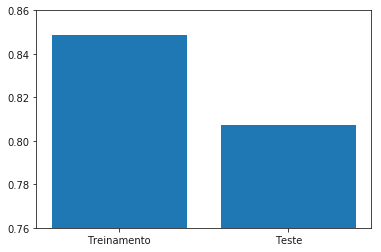

In [73]:
plt.bar(['Treinamento', 'Teste'],[acc_train, acc_test])
plt.ylim(bottom=0.76, top=0.86)


### Trabalhando com valores faltosos que foram substítuidos

In [ ]:
# Depois de ter feitos testes com o # de vizinhos de 3 até 10 o # de vizinhos igual a 4 foi o que teve melhor resultado

knn3_mf = KNeighborsClassifier(n_neighbors=3)
knn4_mf = KNeighborsClassifier(n_neighbors=4)
knn5_mf = KNeighborsClassifier() # 5
knn6_mf = KNeighborsClassifier(n_neighbors=6)
knn7_mf = KNeighborsClassifier(n_neighbors=7)
knn8_mf = KNeighborsClassifier(n_neighbors=8)
knn9_mf = KNeighborsClassifier(n_neighbors=9)
knn10_mf = KNeighborsClassifier(n_neighbors=10)

In [ ]:
# Treinando os modelos e verificando o tempo de processamento

%timeit knn3_mf.fit(X_train_mf, y_train_mf)
%timeit knn4_mf.fit(X_train_mf, y_train_mf)
%timeit knn5_mf.fit(X_train_mf, y_train_mf)
%timeit knn6_mf.fit(X_train_mf, y_train_mf)
%timeit knn7_mf.fit(X_train_mf, y_train_mf)
%timeit knn8_mf.fit(X_train_mf, y_train_mf)
%timeit knn9_mf.fit(X_train_mf, y_train_mf)
%timeit knn10_mf.fit(X_train_mf, y_train_mf)

In [ ]:
# Realizando as predições

knn_y_pred3_mf = knn3_mf.predict(X_test)
knn_y_pred4_mf = knn4_mf.predict(X_test)
knn_y_pred5_mf = knn5_mf.predict(X_test)
knn_y_pred6_mf = knn6_mf.predict(X_test)
knn_y_pred7_mf = knn7_mf.predict(X_test)
knn_y_pred8_mf = knn8_mf.predict(X_test)
knn_y_pred9_mf = knn9_mf.predict(X_test)
knn_y_pred10_mf = knn10_mf.predict(X_test)

In [ ]:
# Verificando a acurácia dos modelos

# print('2 vizinhos = ', accuracy_score(y_test, knn_y_pred2))
print('3 vizinhos = ', accuracy_score(y_test_mf, knn_y_pred3_mf))
print('4 vizinhos = ', accuracy_score(y_test_mf, knn_y_pred4_mf))
print('5 vizinhos = ', accuracy_score(y_test_mf, knn_y_pred5_mf))
print('6 vizinhos = ', accuracy_score(y_test_mf, knn_y_pred6_mf))
print('7 vizinhos = ', accuracy_score(y_test_mf, knn_y_pred7_mf))
print('8 vizinhos = ', accuracy_score(y_test_mf, knn_y_pred8_mf))
print('9 vizinhos = ', accuracy_score(y_test_mf, knn_y_pred9_mf))
print('10 vizinhos = ', accuracy_score(y_test_mf, knn_y_pred10_mf))

#### Análise do Overfitting e Underfitting

In [ ]:
# Análise com os dados de treinamento e teste

knn_x_pred_mf = knn.predict(X_train_mf)
acc_train_mf = accuracy_score(y_train_mf, knn_x_pred_mf)
acc_test_mf = accuracy_score(y_test_mf, knn_y_pred4_mf)

#### Usando os dados com os valores faltosos substituidos em vez de apagados, o overfitting ficou mais atenuado e a acurácia dos dados de testes foi reduzida consideravelmente.

In [ ]:
plt.bar(['Treinamento', 'Teste'],[acc_train_mf, acc_test_mf])
plt.ylim(bottom=0.65, top=0.82)

### Naive Bayes

#### Naive Bayes se baseia no teorena de Bayes e assume que as características do conjunto dos dados são independentes, ou seja, eles não estão relacionados uns com os outros. O teorema de Bayes utiliza informações de eventos anteriores para calcular a probabilidade de um evento acontecer.
#### Apesar de ter características simples, o Naive Bayes é conhecido pelo seu desempenho em aplicações do mundo real, como classificação de documentos e filtro de spam. Além de ser rápido no aprendizado e na classificação comparado com outros classificadores.

#### O Naive Bayes foi escolhido por ser rápido para treinamento e predição e ainda assim ter uma boa acurácia. Um outra característica importante é ser bastante resistente a overfit.

In [ ]:
gnb = GaussianNB()

### Trabalhando com valores faltosos que foram apagados

In [ ]:
%timeit gnb.fit(X_train, y_train)

In [ ]:
gnb_y_pred = gnb.predict(X_test)
gnb_x_pred = gnb.predict(X_train)

In [ ]:
acc_testNB = accuracy_score(y_test, gnb_y_pred)
acc_trainNB = accuracy_score(y_train, gnb_x_pred)

#### Análise do Overfitting e Underfitting

#### Diferentemente do KNN a acurácia dos dados de testes foi maior que do dado de treinamento, ou seja aconteceu um underfitting. Contudo, a diferença não foi muito grande entre as acurácias.

In [ ]:
plt.bar(['Treinamento', 'Teste'],[acc_trainNB, acc_testNB])
plt.ylim(bottom=0.695, top=0.725)

### Trabalhando com valores faltosos que foram substítuidos

In [ ]:
%timeit gnb.fit(X_train_mf, y_train_mf)

In [ ]:
gnb_y_pred_mf = gnb.predict(X_test_mf)
gnb_x_pred_mf = gnb.predict(X_train_mf)

#### Análise do Overfitting e Underfitting

In [ ]:
acc_testNB_mf = accuracy_score(y_test_mf, gnb_y_pred_mf)
acc_trainNB_mf = accuracy_score(y_train_mf, gnb_x_pred_mf)

#### Da mesma forma do que os dados faltosos apagados, a acurácia dos dados de testes foi maior que dos dados de treinamento, ou seja aconteceu um underfitting. Mas, essa diferença ainda foi menor do que no caso anterior e as acurácias foram menores. 

In [ ]:
plt.bar(['Treinamento', 'Teste'],[acc_trainNB_mf, acc_testNB_mf])
plt.ylim(bottom=0.695, top=0.72)

### Conclusão

#### Analisando os resultados obtidos com o Naive Bayes e o KNN, usando tanto dados apagados quanto dados substítuidos, podemos concluir:

#### 1 - Apagando linhas de dados faltosos, há um melhor desempenho nos algoritmos, mesmo com a significativa redução do conjunto de dados.
#### 2 - Entre os dois algoritmos, o KNN foi o que teve melhor desempenho, tanto com os dados substituídos quanto com os apagados.